In [1]:
!pip install scikit-learn missingno seaborn -q

**Import Libraries**

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno # for viewing missing data nicely
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

**Load Dataset**

In [3]:
# download the dataset
#!pip install wget
#!python -m wget https://www.kaggle.com/datasets/abdullahiyunus/nigeria-houses-and-prices-dataset?select=nigeria_houses_data.csv -o housing_prices.csv

# !Downloaded file had a couple of issues with opening and reading. 
# Corrected them and saved under new name

In [4]:
housing = pd.read_csv("D:/Machine_Learning/Zummit Africa Fellowship/classes/Zummit_Africa_Fellowship/zummit_cbl_ML/regression/nigeria_houses_data.csv", delimiter=',')

In [5]:
housing.head(10) # view first 10

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
7,2,2,3,6,Detached Bungalow,Epe,Lagos,12000000.0
8,1,1,1,1,Detached Duplex,Lekki,Lagos,200000000.0
9,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000.0


**EXPLORATORY DATA ANALYSIS**

In [6]:
# view quantitaive description of data
housing.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [7]:
# view datatypes and column values 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [8]:
# check for null values
housing.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

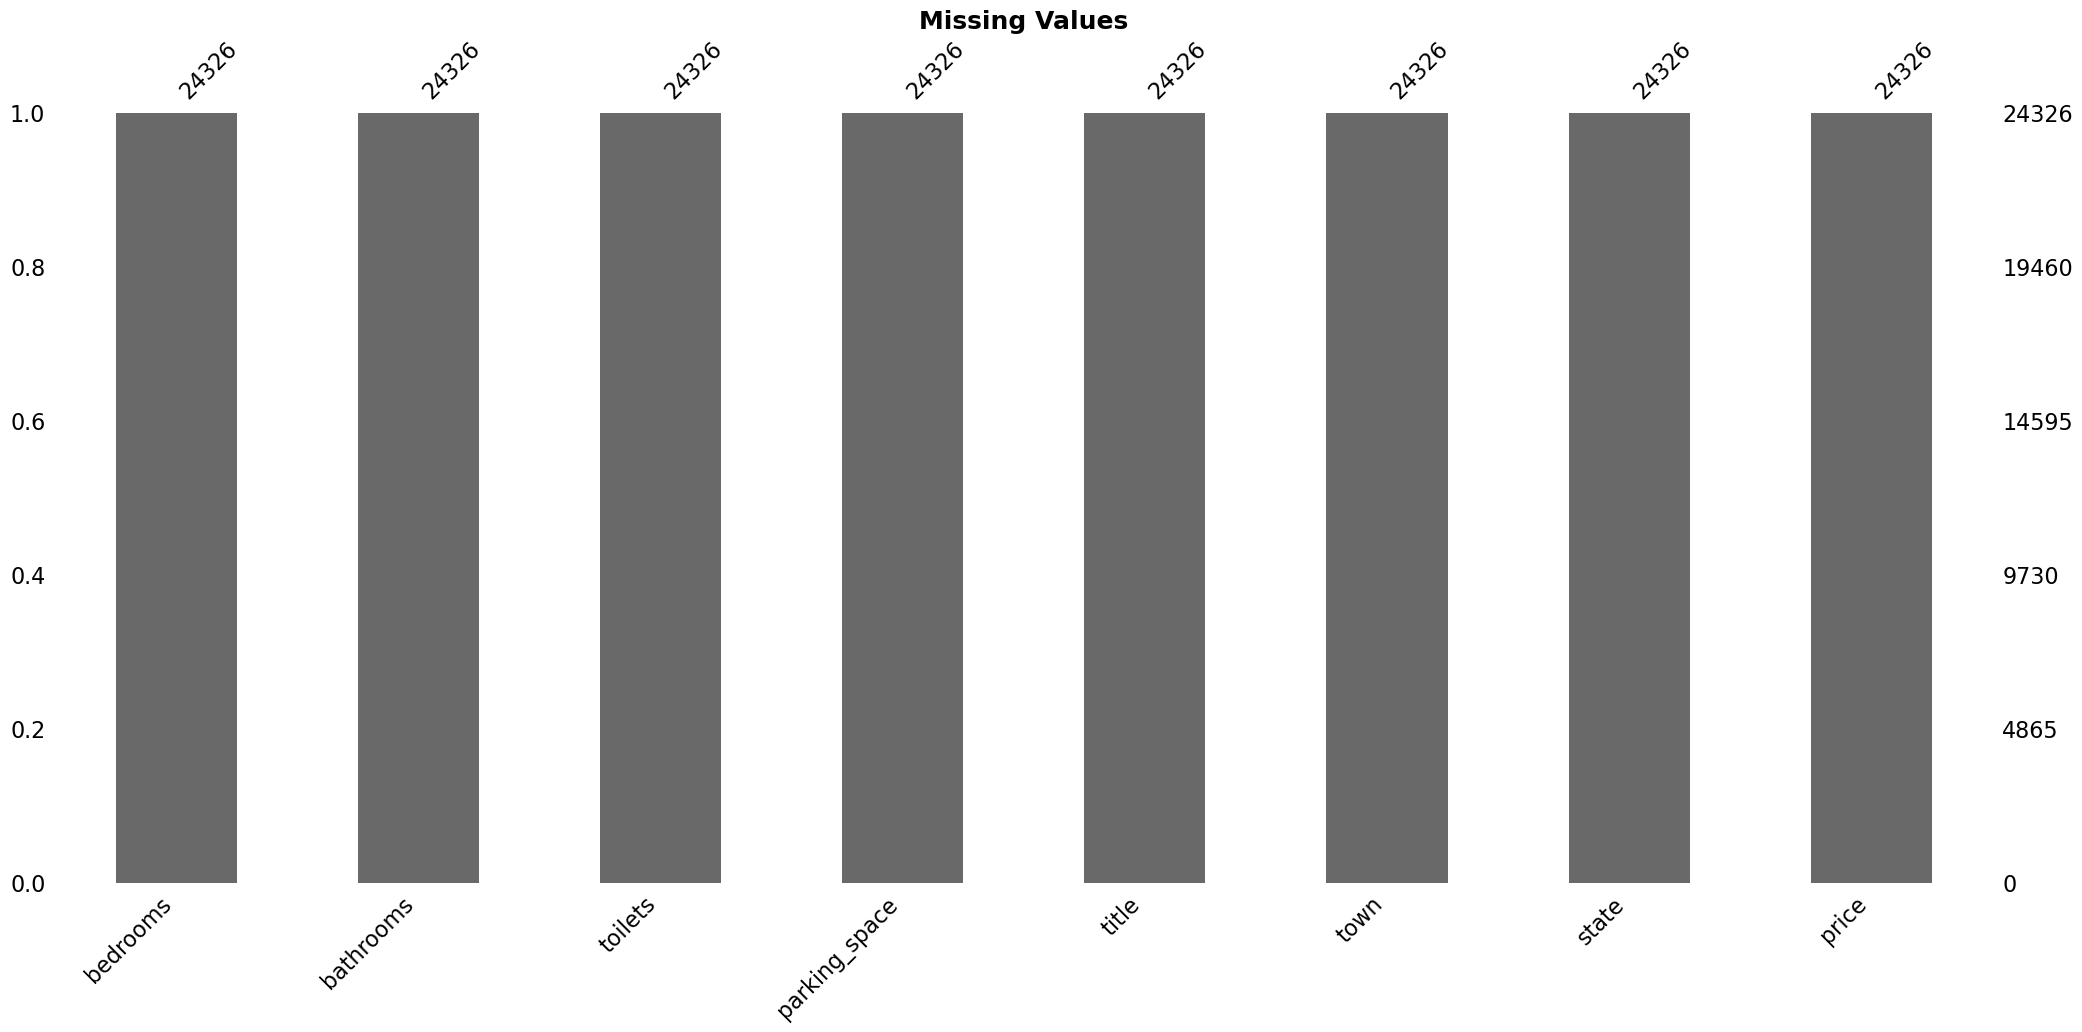

In [9]:
# check for missing values
msno.bar(housing)
plt.title('Missing Values', fontsize=18, fontweight='bold')
plt.show()

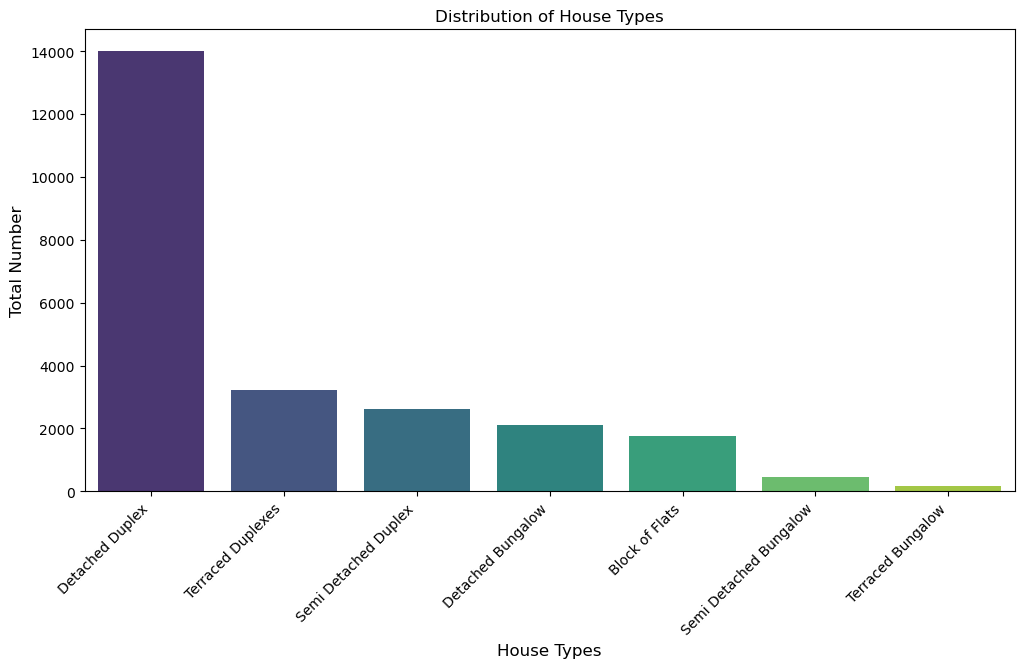

In [10]:
#count plot of house type
plt.figure(figsize=(12, 6))
sns.countplot(x='title', data=housing, palette='viridis')
plt.xlabel('House Types', fontsize=12)
plt.ylabel('Total Number', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of House Types', fontsize=12)
plt.show()

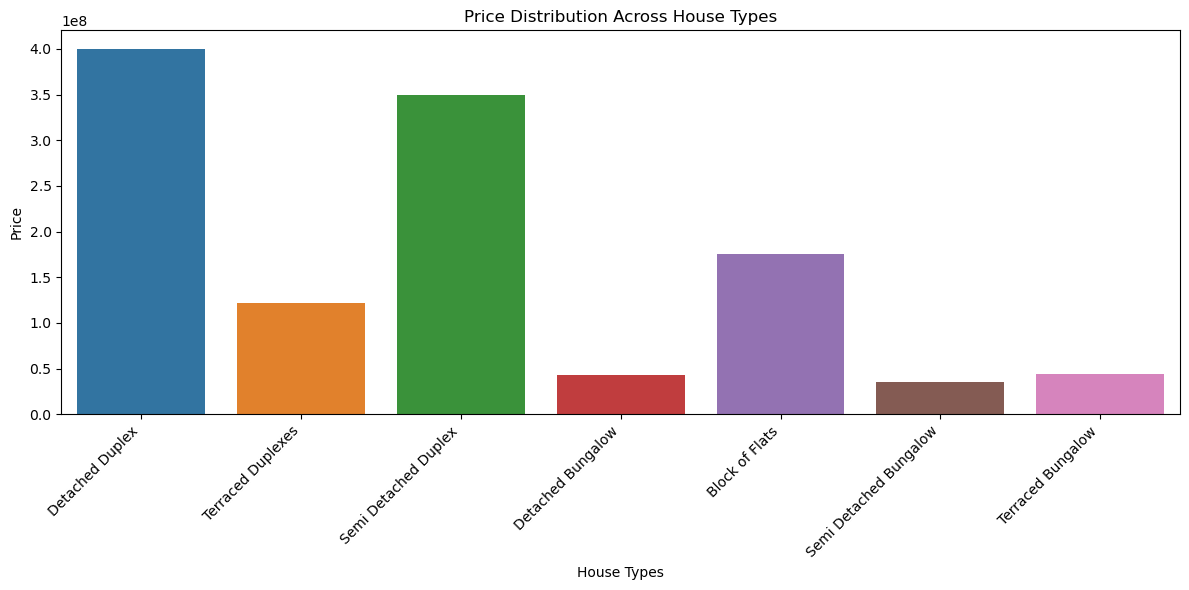

In [11]:
# visualize relationship between house type and prices
plt.figure(figsize=(12, 6))
sns.barplot(x=housing.title, y=housing.price, data=housing, errorbar=None)
plt.title('Price Distribution Across House Types')
plt.xlabel('House Types')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

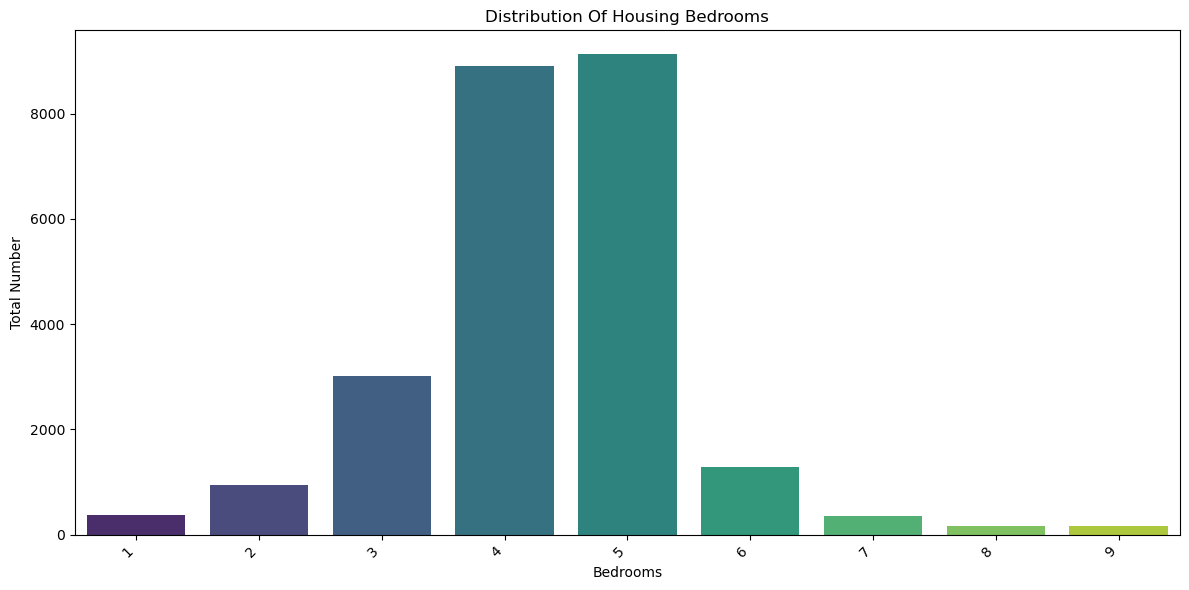

In [12]:
#count plot of bedrooms type
plt.figure(figsize=(12, 6))
sns.countplot(x=housing.bedrooms, data=housing, palette='viridis')
plt.title('Distribution Of Housing Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Total Number')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

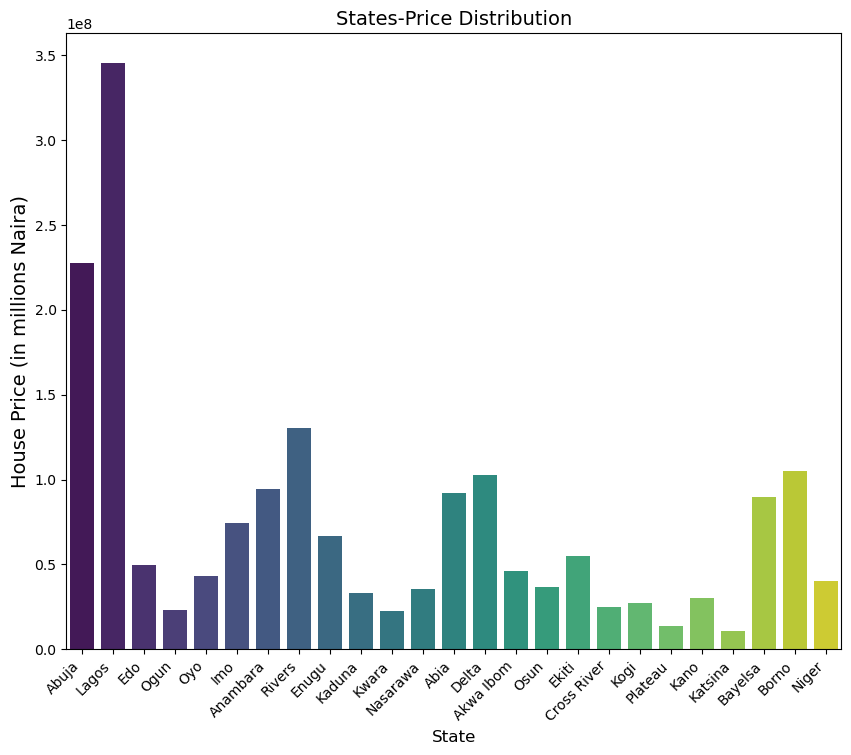

In [13]:
# distribution between price and state
plt.figure(figsize=(10, 8))
sns.barplot(x='state', y='price', data=housing, palette='viridis', errorbar=None)
plt.title('States-Price Distribution', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('House Price (in millions Naira)', fontsize=14)
plt.show()

# FEATURE SCALING AND TRANSFORMATION

In [14]:
# drop some col
# imo, the town column should be dropped because the dataset also contains State which will be a more dependable feature for house price determination
housing = housing.drop('town', axis=1)
housing

,bedrooms,bathrooms,toilets,parking_space,title,state,price
0,6,5,5,4,Detached Duplex,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lagos,75000000.0
...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Lagos,78000000.0


In [15]:
# since the prices are too high and would affect visualizations and regressional analysis, let's scale down

stdscaler = StandardScaler()

# use numerical columns
scale_cols = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']

# Fit_transform cols
scaled_data = stdscaler.fit_transform(housing[scale_cols])

# Convert cols
scaled_df = pd.DataFrame(scaled_data, columns=scale_cols)

In [16]:
scaled_df

,bedrooms,bathrooms,toilets,parking_space,price
0,1.459133,0.343212,-0.143819,-0.029805,0.012178
1,-0.297604,0.343212,-0.143819,-0.029805,0.040858
2,-0.297604,0.343212,-0.143819,-0.029805,-0.014863
3,-0.297604,-0.516532,-0.143819,1.398861,-0.021418
4,-0.297604,-0.516532,-0.143819,-1.458471,-0.018550
...,...,...,...,...,...
24321,-2.054341,-2.236020,-2.590345,-0.029805,-0.023467
24322,-0.297604,0.343212,-0.143819,-0.029805,-0.022647
24323,-0.297604,0.343212,-0.143819,-0.029805,-0.019124
24324,-1.175973,-0.516532,-0.959328,-0.744138,-0.018304


In [17]:
scaled_df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,2.432600e+04,2.432600e+04,2.432600e+04,2.432600e+04,2.432600e+04
mean,-1.580217e-16,-3.382424e-16,1.710198e-16,1.743058e-16,1.752551e-18
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-2.932710e+00,-3.095764e+00,-3.405854e+00,-2.172804e+00,-2.468828e-02
25%,-2.976040e-01,-5.165320e-01,-1.438187e-01,-2.980548e-02,-2.043468e-02
50%,-2.976040e-01,3.432119e-01,-1.438187e-01,-2.980548e-02,-1.773059e-02
75%,5.807647e-01,3.432119e-01,6.716902e-01,-2.980548e-02,-1.158496e-02
max,4.094240e+00,3.782188e+00,3.118217e+00,3.541859e+00,1.474706e+02


In [18]:
# distribution of price against house type
cat_cols = ['title', 'state']
df_cat = housing[cat_cols]
full_df = pd.concat([scaled_df, df_cat], axis=1)

# Checking for NaN values
full_df.isnull().sum()


bedrooms         0
bathrooms        0
toilets          0
parking_space    0
price            0
title            0
state            0
dtype: int64

In [19]:
full_df

,bedrooms,bathrooms,toilets,parking_space,price,title,state
0,1.459133,0.343212,-0.143819,-0.029805,0.012178,Detached Duplex,Abuja
1,-0.297604,0.343212,-0.143819,-0.029805,0.040858,Terraced Duplexes,Abuja
2,-0.297604,0.343212,-0.143819,-0.029805,-0.014863,Detached Duplex,Lagos
3,-0.297604,-0.516532,-0.143819,1.398861,-0.021418,Detached Duplex,Lagos
4,-0.297604,-0.516532,-0.143819,-1.458471,-0.018550,Semi Detached Duplex,Lagos
...,...,...,...,...,...,...,...
24321,-2.054341,-2.236020,-2.590345,-0.029805,-0.023467,Block of Flats,Abuja
24322,-0.297604,0.343212,-0.143819,-0.029805,-0.022647,Block of Flats,Ogun
24323,-0.297604,0.343212,-0.143819,-0.029805,-0.019124,Detached Duplex,Lagos
24324,-1.175973,-0.516532,-0.959328,-0.744138,-0.018304,Block of Flats,Lagos


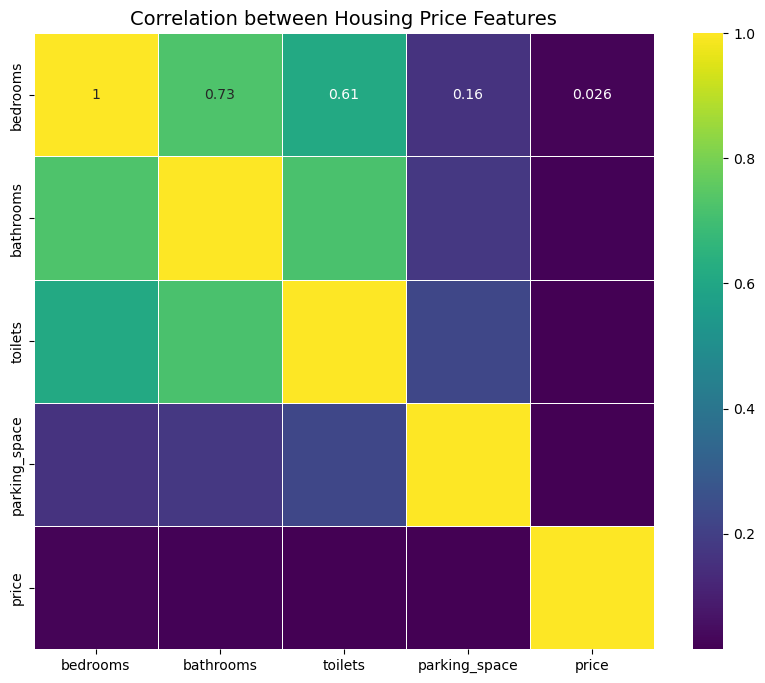

In [31]:
# heatmap (no strong correlation between the quantitative features and targets hence no showing of correlation values for some of the columns)
housing_heat = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']
hhm = full_df[housing_heat]

plt.figure(figsize=(10, 8))
sns.heatmap(data=hhm.corr(), annot=True, cmap='viridis', linewidth=0.5)
housing[['bedrooms','bathrooms','toilets','parking_space','price']].corr()['price']
plt.title('Correlation between Housing Price Features', fontsize=14)
plt.show()

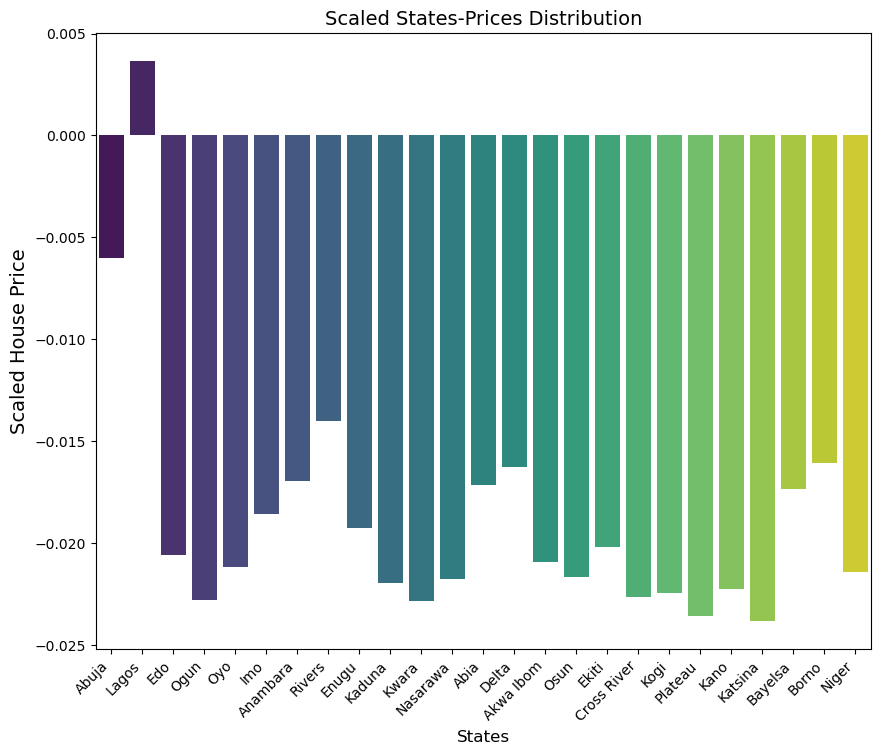

In [21]:
# distribution between price and state
plt.figure(figsize=(10,8))
sns.barplot(x=full_df.state, y=full_df.price, data=housing, palette='viridis', errorbar=None)
plt.title('Scaled States-Prices Distribution', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Scaled House Price', fontsize=14)
plt.show()

# MODEL BUILDING

In [22]:
# Load model pipeline libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

In [23]:
# # select categorical features of interest to encode
# categorical_features = ['state', 'title']

# # Splitting features and target variable
# X = full_df.drop('price', axis=1)
# y = full_df['price']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocess categorical variables
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ],
#     remainder='passthrough', # leave quantitative columns intact
# )

# # Define the model in the Pipeline
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])



In [24]:
# # Train the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Calculate RMSE
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print("Root Mean Squared Error (RMSE):", rmse) # very good RMSE - bothers on overfitting


In [25]:
#print('Variance score: %.2f' % model.score(X_test, y_test)) # very alarming variance score (should be between 0 and 1 but never negative). Something is wrong!!!!

**Improve Model**

In [26]:
scaled_df

,bedrooms,bathrooms,toilets,parking_space,price
0,1.459133,0.343212,-0.143819,-0.029805,0.012178
1,-0.297604,0.343212,-0.143819,-0.029805,0.040858
2,-0.297604,0.343212,-0.143819,-0.029805,-0.014863
3,-0.297604,-0.516532,-0.143819,1.398861,-0.021418
4,-0.297604,-0.516532,-0.143819,-1.458471,-0.018550
...,...,...,...,...,...
24321,-2.054341,-2.236020,-2.590345,-0.029805,-0.023467
24322,-0.297604,0.343212,-0.143819,-0.029805,-0.022647
24323,-0.297604,0.343212,-0.143819,-0.029805,-0.019124
24324,-1.175973,-0.516532,-0.959328,-0.744138,-0.018304


In [27]:
# use only scaled_df

# Splitting features and target variable
X = scaled_df.drop('price', axis=1)
y = scaled_df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse) # an evenn better RMSE but model still overfitting


Root Mean Squared Error (RMSE): 0.00164953675076755


In [28]:
print('Variance score: %.2f' % model.score(X_test, y_test)) # hence poor variance

Variance score: -1.99
